Лабораторная работа №7


In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from matplotlib import pylab as plt
from matplotlib import pyplot as ppl

# 1. Загрузите данные ex7data1.mat из файла.

mat = loadmat('ex7data1.mat')

X = pd.DataFrame(mat['X'])

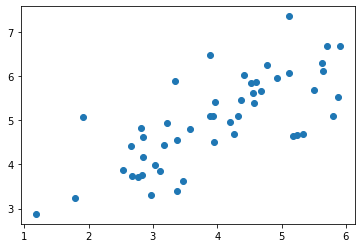

In [2]:
# 2. Постройте график загруженного набора данных.

plt.scatter(X[0], X[1])
plt.show()

In [3]:
# 3. Реализуйте функцию вычисления матрицы ковариации данных.

def cov(data: np.ndarray):
    centered = data - data.mean(axis=0)
    size = len(data)
    return (centered.T.conj() @ centered) / (size - 1)

X_cov = cov(X.to_numpy())

In [4]:
# 4. Вычислите координаты собственных векторов для набора данных с помощью сингулярного разложения матрицы ковариации

U, e, V = np.linalg.svd(X_cov)
vector = (V.T * e).T

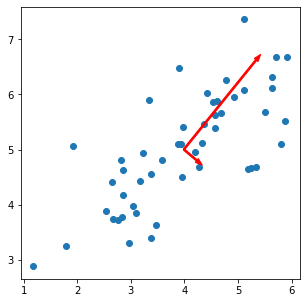

In [5]:
# 5. Постройте на графике из пункта 2 собственные векторы матрицы ковариации.

m = X.to_numpy().mean(axis=0)
plt.figure(figsize=(5, 5))
plt.arrow(m[0], m[1], -vector[0,1], -vector[0,0], color="red", width = 0.03)
plt.arrow(m[0], m[1], vector[1,1], vector[1,0], color="red", width = 0.03)
plt.scatter(X[0], X[1])
plt.show()


In [6]:
# 6. Реализуйте функцию проекции из пространства большей размерности в пространство меньшей размерности с помощью метода главных компонент.

def reduce(data: np.ndarray, n: int) -> tuple:
    mean = data.mean(axis=0)
    centered = data - mean
    data_cov = (centered.T.conj() @ centered) / (len(data) - 1)
    U, e, V = np.linalg.svd(data_cov)
    return centered @ V[:n].T, mean, V[:n]


In [7]:
# 7. Реализуйте функцию вычисления обратного преобразования.

def back_transform(data: np.ndarray, v: np.ndarray, mean: np.ndarray) -> np.ndarray:
    return  (data @ v) + mean

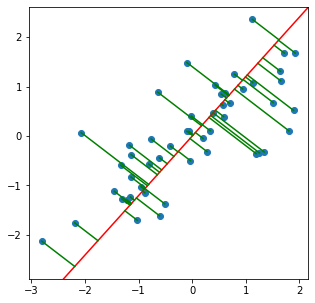

In [8]:
#8. Постройте график исходных точек и их проекций на пространство меньшей размерности (с линиями проекций).

res, m, v = reduce(X.to_numpy(), 1)
vec = np.array([- vector[0,1], - vector[0,0]])


l2 = np.sum(vec**2)
t = np.sum((X.to_numpy() - m) * vec, axis=1) / l2
projection = vec * t.reshape(50,1)

plt.figure(figsize=(5, 5))
plt.axline((0, 0), (- vector[0,1], - vector[0,0]), c="red")
plt.scatter(X[0] - m[0], X[1] - m[1])
x = X - m
for id, val in enumerate(projection):
    plt.plot([val[0], x.iloc[id, 0]], [val[1], x.iloc[id, 1]], c = "green")
plt.show()

In [9]:
# 9. Загрузите данные ex7faces.mat из файла.

mat = loadmat('ex7faces.mat')
X = pd.DataFrame(mat['X'])

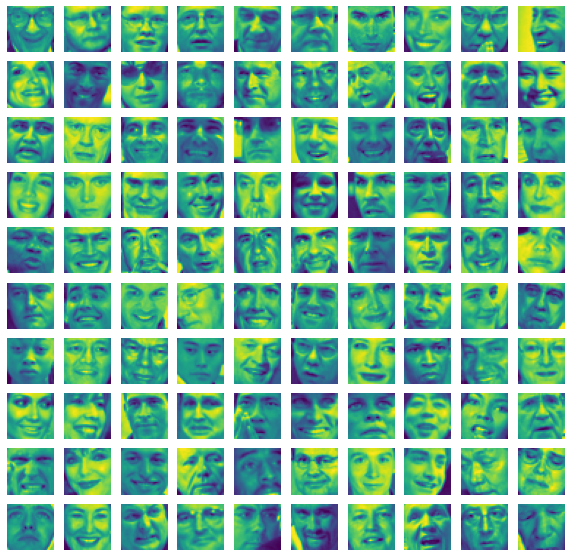

In [10]:
# 10. Визуализируйте 100 случайных изображений из набора данных.

def displayData(data: np.ndarray):
    fig=plt.figure(figsize=(10, 10))
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        ppl.imshow(data[i].reshape(32,32).T)
        plt.axis('off')
    plt.show()

displayData(X.to_numpy())


In [11]:
# 11. С помощью метода главных компонент вычислите собственные векторы.

X_cov = cov(X.to_numpy())
_, e, V = np.linalg.svd(X_cov)
vector = (V.T * e).T

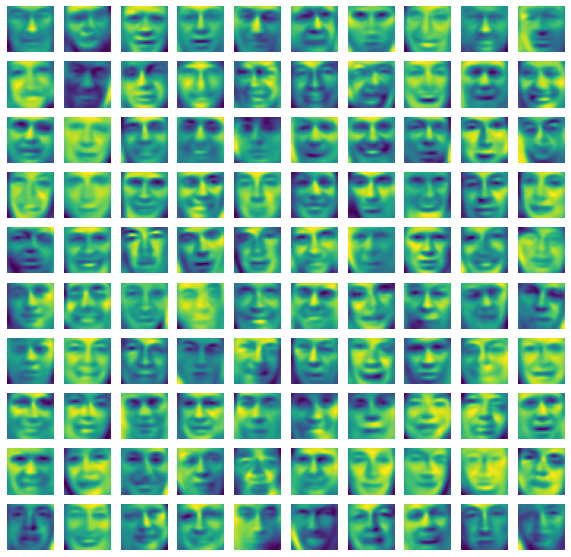

In [12]:
# 12. Визуализируйте 36 главных компонент с наибольшей дисперсией.

res, m, v = reduce(X.to_numpy(), 36)
data = back_transform(res, v, m)
displayData(data)


In [13]:
# 13. Как изменилось качество выбранных изображений?

print("Изображения стали размытыми")


Изображения стали размытыми


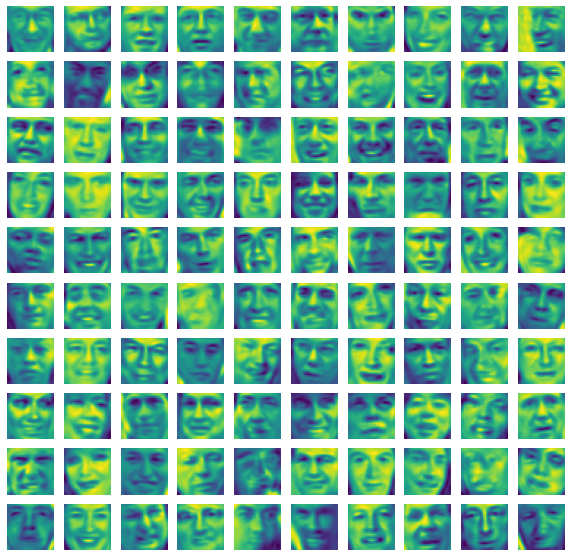

In [14]:
# 14. Визуализируйте 100 главных компонент с наибольшей дисперсией.

res, m, v = reduce(X.to_numpy(), 100)
data = back_transform(res, v, m)
displayData(data)


In [15]:
# 15. Как изменилось качество выбранных изображений?

print("Изображения стали размытыми, но качество лучше чем при 36 главных ")


Изображения стали размытыми, но качество лучше чем при 36 главных 


In [16]:
# 16. Используйте изображение, сжатое в лабораторной работе №6

mat = loadmat('result.mat')
shape = mat["X"].shape
X = pd.DataFrame(mat["X"].reshape(shape[0] * shape[1], shape[2]))

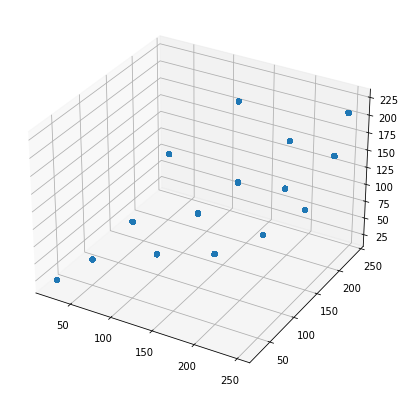

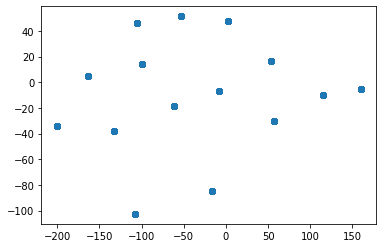

In [17]:
# 17. С помощью метода главных компонент визуализируйте данное изображение в 3D и 2D.

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[0], X[1], X[2])
plt.show()

res, m, v = reduce(X.to_numpy(), 2)

plt.scatter( res[:, 0], res[:, 1])
plt.show()

In [1]:
# 18. Соответствует ли 2D изображение какой-либо из проекций в 3D?

print("Последовательность точек напоминает проекцию на оси X, Y")

Последовательность точек напоминает проекцию на оси X, Y
